In [1]:
import upath
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dynamic_routing_analysis import decoding_utils, path_utils

In [ ]:
#sessions run:
#['668755_2023-08-30','703880_2024-04-15','713655_2024-08-09']

In [2]:
path=path_utils.DECODING_ROOT_PATH
for file in path.glob('*'):
    print(file)

s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/full_logreg_medcrit_2024-11-26T16:45:38.919765
s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/full_logreg_medcrit_2024-11-26T23:54:35.702811
s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/full_test_LDA_medcrit_2024-11-09T00:33:11.111162
s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/full_test_logreg_medcrit_2024-11-11T18:39:59.601162
s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/logreg_many_n_units_3_2024-12-17
s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/logreg_many_n_units_medium_criteria_2024-12-18
s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/logreg_many_n_units_medium_criteria_2025-01-06
s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/logreg_many_n_units_medium_criteria_2025-01-08
s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/logreg_many_n_units_sliding_rp_criteria_2024-12-20
s3://aind-scratch-data

In [3]:
#compare accuracy across regularization values

#find the appropriate paths

#find folders/files on S3 with decoding results

paths={}
paths_1={}
# path=path_utils.DECODING_ROOT_PATH

paths[10e3]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e3_12-19-24")
paths[10e2]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e2_12-19-24")
paths[10e1]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e1_12-19-24")
paths[10e0]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e0_12-19-24")
paths[10e-1]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-1_12-19-24")
paths[10e-2]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-2_12-19-24")
paths[10e-3]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-3_12-19-24")
paths[10e-4]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-4_12-19-24")
paths[10e-5]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-5_12-19-24")
paths[10e-6]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-6_12-19-24")

paths_1[10e3]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e3_01-10-2024")
paths_1[10e2]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e2_01-10-2024")
paths_1[10e1]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e1_01-10-2024")
paths_1[10e0]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e0_01-10-2024")
paths_1[10e-1]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-1_01-10-2024")
paths_1[10e-2]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-2_01-10-2024")
paths_1[10e-3]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-3_01-10-2024")
paths_1[10e-4]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-4_01-10-2024")
paths_1[10e-5]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-5_01-10-2024")
paths_1[10e-6]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-6_01-10-2024")

first_path=True
results_path_list=[]
for key in paths.keys():
    path=paths[key]
    for file in path.glob('*'):
        if 'results.csv' in str(file):
            # results_path_list.append(file)
            temp_results=pd.read_csv(file)
            temp_results['regularization']=key
            if first_path:
                results=temp_results
                first_path=False
            else:
                results=pd.concat([results,temp_results],axis=0)

for key in paths_1.keys():
    path=paths_1[key]
    for file in path.glob('*'):
        if 'results.csv' in str(file):
            # results_path_list.append(file)
            temp_results=pd.read_csv(file)
            temp_results['regularization']=key
            if first_path:
                results=temp_results
                first_path=False
            else:
                results=pd.concat([results,temp_results],axis=0)



In [ ]:
results.columns

In [4]:
results

,Unnamed: 0,session_id,project,area,ccf_ap_mean,ccf_dv_mean,ccf_ml_mean,n_units,probe,cross_modal_dprime,...,null_accuracy_std_20,p_value_20,true_accuracy_all_trials_no_shift_20,true_accuracy_all,null_accuracy_mean_all,null_accuracy_median_all,null_accuracy_std_all,p_value_all,true_accuracy_all_trials_no_shift_all,regularization
0,0,668755_2023-08-30,DynamicRouting,PIR,4775.000000,5850.000000,2950.000000,9,NaN,1.763112,...,NaN,NaN,NaN,0.636854,0.558142,0.561004,0.042075,0.000000,0.624220,10000.00000
1,1,668755_2023-08-30,DynamicRouting,OLF,4750.000000,5800.000000,2950.000000,7,A,1.763112,...,NaN,NaN,NaN,0.550418,0.546400,0.549210,0.019541,0.456790,0.564097,10000.00000
2,2,668755_2023-08-30,DynamicRouting,CTXsp,4735.714286,5764.285714,2950.000000,7,NaN,1.763112,...,NaN,NaN,NaN,0.533774,0.501392,0.500564,0.030874,0.123457,0.558394,10000.00000
3,3,668755_2023-08-30,DynamicRouting,EPd,4638.888889,5418.518519,2910.185185,27,NaN,1.763112,...,0.090542,0.000000,0.827104,0.867955,0.686567,0.694257,0.099437,0.012346,0.861452,10000.00000
4,4,668755_2023-08-30,DynamicRouting,CP,4560.000000,5122.857143,2903.571429,35,NaN,1.763112,...,0.084454,0.012346,0.825116,0.842319,0.681908,0.689339,0.096355,0.024691,0.878605,10000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,19,713655_2024-08-09,DynamicRouting,MOs,4154.274611,1900.518135,4571.373057,193,F,3.002527,...,0.022771,0.073171,0.638615,0.778277,0.662136,0.660042,0.058345,0.024390,0.817699,0.00001
20,20,713655_2024-08-09,DynamicRouting,all,6169.419374,3165.598676,2938.763538,1662,NaN,3.002527,...,0.025820,0.060976,0.602220,0.848362,0.726959,0.734910,0.077471,0.060976,0.851455,0.00001
21,21,713655_2024-08-09,DynamicRouting,LSr,4849.596774,4028.494624,5285.618280,186,all,3.002527,...,0.006657,0.036585,0.552460,0.556237,0.558449,0.557373,0.023530,0.524390,0.593148,0.00001
22,22,713655_2024-08-09,DynamicRouting,MOp,4681.849315,2119.748858,3797.716895,219,all,3.002527,...,0.024092,0.048780,0.639617,0.750317,0.664196,0.658562,0.045065,0.048780,0.735476,0.00001


In [ ]:
# savepath=r"D:\decoding_results_from_CO\regularization_test_12-20-24"
# results.to_csv(os.path.join(savepath,'decoding_results_regularization_comparison.csv'))

In [ ]:
area_results=results.query('area=="MOs" and probe=="all"')

area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']

In [ ]:
# area_results
# results.query('true_accuracy_20.isna()==False')

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(area_results['regularization'],area_results['diff_from_null_20'],'o-',label='20 units')
ax.plot(area_results['regularization'],area_results['diff_from_null_all'],'o-',label='all units')
ax.set_xscale('log')
ax.set_xlabel('Regularization')
ax.set_ylabel('Accuracy above null')
ax.set_title('MOs')
ax.legend()

In [ ]:
unique_areas=results['area'].unique()
unique_areas

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7592\2097218126.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7592\2097218126.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7

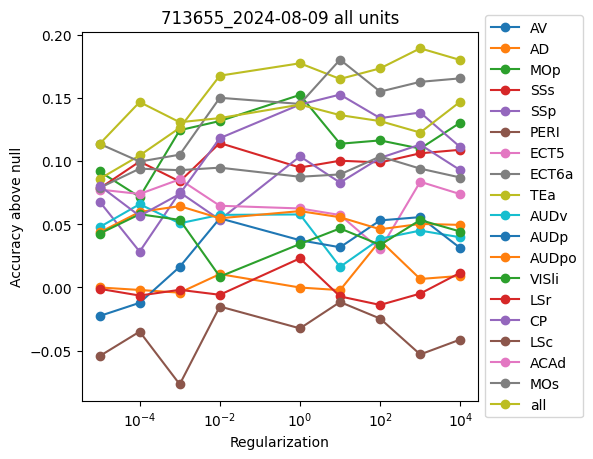

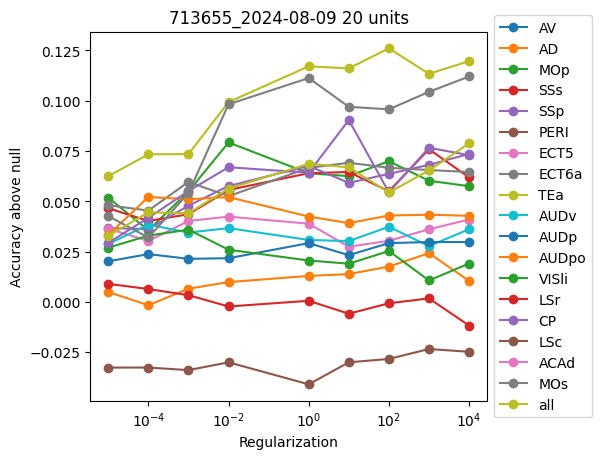

In [17]:
sel_areas=['CP', 'AId', 'GU', 'MOp', 'ORBl','FRP', 'MOs', 'ACAv', 
           'ACAd', 'RSPv', 'RSPd', 'VISam', 'LGv','SSp', 'all', 'SCs']

# session='668755_2023-08-30'
# session='703880_2024-04-15'
session='713655_2024-08-09'

sel_areas=results.query('session_id==@session')['area'].unique()

savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2025-01-13_decoder_regularization"

fig_all,ax_all=plt.subplots(1,1)
fig_20,ax_20=plt.subplots(1,1)

for area in sel_areas:
    area_results=results.query('area==@area and true_accuracy_20.isna()==False and session_id==@session')
    area_probes=area_results['probe'].unique()
    
    if 'all' in area_probes:
        area_results=area_results.query('probe=="all"')

    area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
    area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']
    ax_20.plot(area_results['regularization'],area_results['diff_from_null_20'],'o-',label=area)
    ax_all.plot(area_results['regularization'],area_results['diff_from_null_all'],'o-',label=area)

    fig,ax=plt.subplots(1,1)
    ax.plot(area_results['regularization'],area_results['diff_from_null_20'],'o-',label='20 units')
    ax.plot(area_results['regularization'],area_results['diff_from_null_all'],'o-',label='all units')
    ax.set_xscale('log')
    ax.set_xlabel('Regularization')
    ax.set_ylabel('Accuracy above null')
    ax.set_title(area+' '+session)
    ax.legend()

    fig.savefig(os.path.join(savepath,session+'_'+area+'.png'))
    plt.close(fig)

ax_20.set_xscale('log')
ax_20.set_xlabel('Regularization')
ax_20.set_ylabel('Accuracy above null')
ax_20.set_title(session+' 20 units')
box = ax_20.get_position()
ax_20.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_20.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_20.savefig(os.path.join(savepath,session+'_all_areas_20.png'))

ax_all.set_xscale('log')
ax_all.set_xlabel('Regularization')
ax_all.set_ylabel('Accuracy above null')
ax_all.set_title(session+' all units')
box = ax_all.get_position()
ax_all.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_all.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_all.savefig(os.path.join(savepath,session+'_all_areas_all.png'))

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7592\2078895439.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7592\2078895439.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7

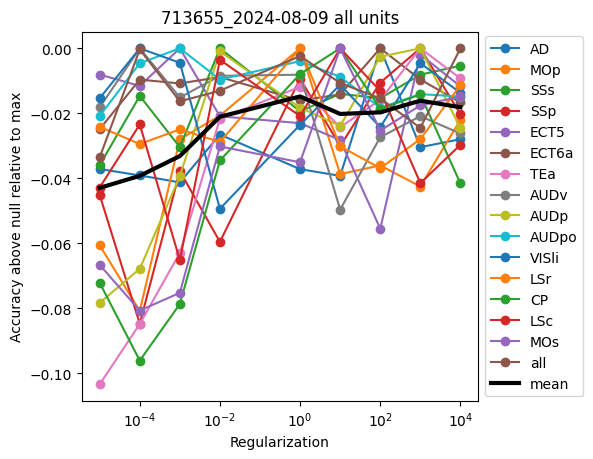

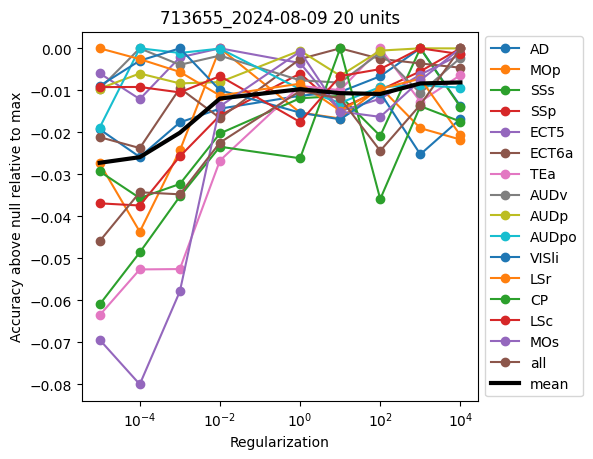

In [11]:
# sel_areas=['CP', 'AId', 'GU', 'MOp', 'ORBl','FRP', 'MOs', 'ACAv', 
#            'ACAd', 'RSPv', 'RSPd', 'VISam', 'LGv','SSp', 'all', 'SCs','SCm']
# sel_areas=['SCiw']

savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2025-01-13_decoder_regularization"

# session='668755_2023-08-30'
# session='703880_2024-04-15'
session='713655_2024-08-09'

fig_all,ax_all=plt.subplots(1,1)
fig_20,ax_20=plt.subplots(1,1)

all_areas_20=[]
all_areas_all=[]

sel_areas=results.query('session_id==@session')['area'].unique()

for area in sel_areas:
    area_results=results.query('area==@area and true_accuracy_20.isna()==False and session_id==@session')
    area_probes=area_results['probe'].unique()
    
    if 'all' in area_probes:
        area_results=area_results.query('probe=="all"')

    if len(area_results)==0:
        continue

    area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
    area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']
    ax_20.plot(area_results['regularization'],area_results['diff_from_null_20']-area_results['diff_from_null_20'].max(),'o-',label=area)
    ax_all.plot(area_results['regularization'],area_results['diff_from_null_all']-area_results['diff_from_null_all'].max(),'o-',label=area)

    all_areas_20.append(area_results['diff_from_null_20'].values-area_results['diff_from_null_20'].max())
    all_areas_all.append(area_results['diff_from_null_all'].values-area_results['diff_from_null_all'].max())

ax_20.plot(area_results['regularization'],np.nanmean(all_areas_20,axis=0),'k-',label='mean',linewidth=3)
ax_20.set_xscale('log')
ax_20.set_xlabel('Regularization')
ax_20.set_ylabel('Accuracy above null relative to max')
ax_20.set_title(session+' 20 units')
box = ax_20.get_position()
ax_20.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_20.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_20.savefig(os.path.join(savepath,session+'_all_areas_20_rel_to_max.png'))

ax_all.plot(area_results['regularization'],np.nanmean(all_areas_all,axis=0),'k-',label='mean',linewidth=3)
ax_all.set_xscale('log')
ax_all.set_xlabel('Regularization')
ax_all.set_ylabel('Accuracy above null relative to max')
ax_all.set_title(session+' all units')
box = ax_all.get_position()
ax_all.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_all.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_all.savefig(os.path.join(savepath,session+'_all_areas_all_rel_to_max.png'))

In [ ]:
all_areas_20[10]

In [ ]:
sel_areas=['CP', 'AId', 'GU', 'MOp', 'ORBl','FRP', 'MOs', 'ACAv', 
           'ACAd', 'RSPv', 'RSPd', 'VISam', 'LGv','SSp', 'all', 'SCs']

savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-12-20_decoder_regularization\raw_decoder_accuracy"

fig_all,ax_all=plt.subplots(1,1)
fig_20,ax_20=plt.subplots(1,1)

for area in sel_areas:
    area_results=results.query('area==@area and true_accuracy_20.isna()==False')
    area_probes=area_results['probe'].unique()
    
    if 'all' in area_probes:
        area_results=area_results.query('probe=="all"')

    # area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
    # area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']
    ax_20.plot(area_results['regularization'],area_results['true_accuracy_20'],'o-',label=area)
    ax_20.plot(area_results['regularization'],area_results['null_accuracy_median_20'],'o--',label=area)
    ax_all.plot(area_results['regularization'],area_results['true_accuracy_all'],'^-',label=area)
    ax_all.plot(area_results['regularization'],area_results['null_accuracy_median_all'],'^--',label=area)

    fig,ax=plt.subplots(1,1)
    ax.plot(area_results['regularization'],area_results['true_accuracy_20'],'o-',label='true acc; 20 units')
    ax.plot(area_results['regularization'],area_results['null_accuracy_median_20'],'o--',label='null acc; 20 units')
    ax.plot(area_results['regularization'],area_results['true_accuracy_all'],'^-',label='true acc; all units')
    ax.plot(area_results['regularization'],area_results['null_accuracy_median_all'],'^--',label='null acc; all units')
    ax.set_xscale('log')
    ax.set_xlabel('Regularization')
    ax.set_ylabel('Accuracy above null')
    ax.set_title(area)
    ax.legend()

    fig.savefig(os.path.join(savepath,area+'_raw.png'))
    plt.close(fig)

ax_20.set_xscale('log')
ax_20.set_xlabel('Regularization')
ax_20.set_ylabel('Accuracy above null')
ax_20.set_title('20 units')
box = ax_20.get_position()
ax_20.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_20.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_20.savefig(os.path.join(savepath,'all_areas_raw_20.png'))

ax_all.set_xscale('log')
ax_all.set_xlabel('Regularization')
ax_all.set_ylabel('Accuracy above null')
ax_all.set_title('all units')
box = ax_all.get_position()
ax_all.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_all.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_all.savefig(os.path.join(savepath,'all_areas_raw_all.png'))